<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
(ds_train , ds_test) , ds_info = tfds.load('mnist',
                                           split = ['train','test'],
                                           shuffle_files = True,
                                           as_supervised = True,
                                           with_info = True
                                           )

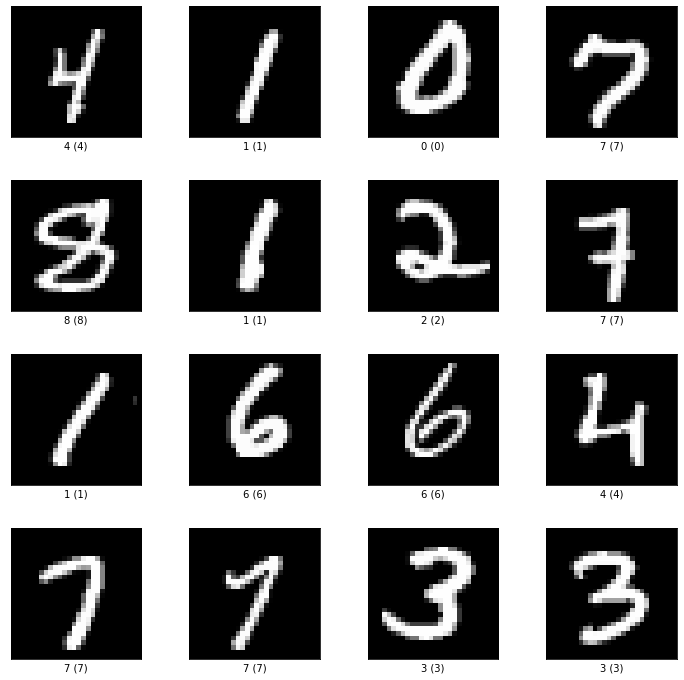

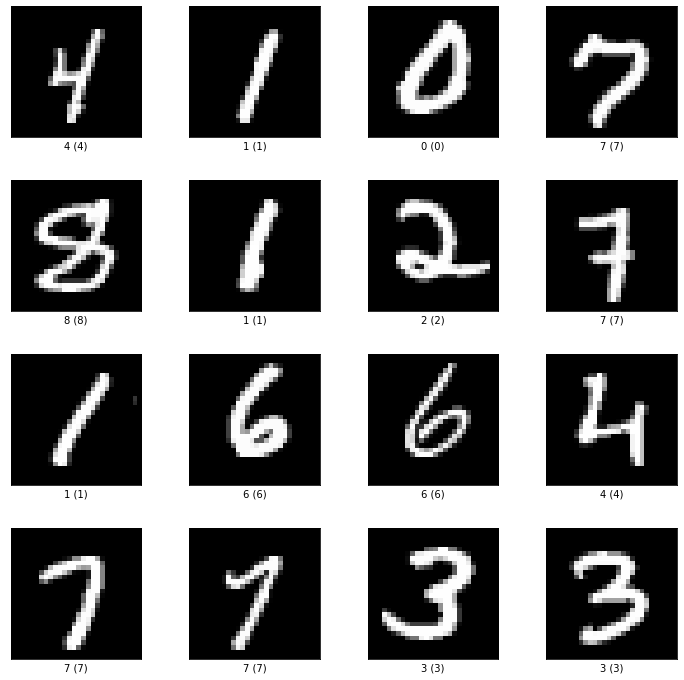

In [161]:
tfds.show_examples(ds_train , ds_info , rows = 4 , cols = 4)

In [162]:
def normalize_image(image , label):
  return tf.cast(image , tf.float32)/255.0 , label

In [163]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
def format_data(ds , batchsize = BATCH_SIZE , shuffle = True):
  ds = ds.map(normalize_image , num_parallel_calls = AUTOTUNE)
  ds = ds.cache()
  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.batch(batchsize)
  ds = ds.prefetch(AUTOTUNE)

  return ds

In [165]:
train_ds = format_data(ds_train)
test_ds = format_data(ds_test, shuffle = False)

In [166]:
train_ds

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

## Visualizing random images

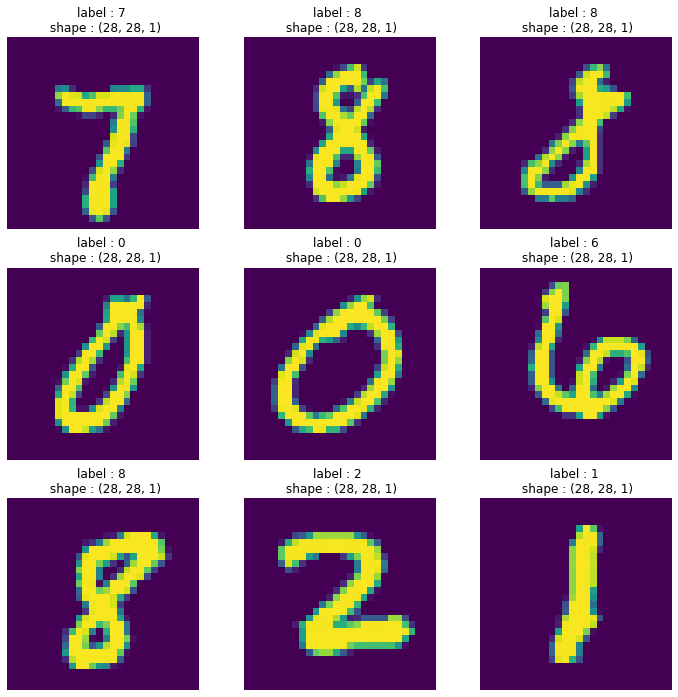

In [168]:
import random 
random_index = random.randint(0,len(ds_train)-9)
examples = train_dataset.skip(random_index).take(9)

plt.figure(figsize = (12,12))
for index , image in enumerate(examples,1):
  plt.subplot(3,3, index)
  plt.title(f"label : {image['label'].numpy()} \n shape : {image['image'].shape}")
  plt.imshow(tf.squeeze(image['image']))
  plt.axis(False)

1. Images are numbers between 0 and 9
2. Image shapes are 28,28,1

## Model 0

In [174]:
model_0 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(3, (3,3), input_shape = (28,28,1), activation = 'relu'),
                               tf.keras.layers.Conv2D(3, (3,3), activation = 'relu'),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Dropout(0.25),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10 , activation = 'softmax')
])

In [175]:
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'],
                run_eagerly = True)

In [176]:
history = model_0.fit(train_ds,
                      steps_per_epoch = len(train_ds)//BATCH_SIZE,
                      epochs = 5,
                      validation_data = test_ds,
                      validation_steps = len(test_ds)//BATCH_SIZE
                      )

Epoch 1/5
58/58 [==============================] - 3s 45ms/step - loss: 1.8263 - accuracy: 0.3847 - val_loss: 2.1571 - val_accuracy: 0.7292
Epoch 2/5
58/58 [==============================] - 3s 46ms/step - loss: 0.8563 - accuracy: 0.7225 - val_loss: 1.8348 - val_accuracy: 0.8264
Epoch 3/5
58/58 [==============================] - 3s 47ms/step - loss: 0.6049 - accuracy: 0.8195 - val_loss: 1.5350 - val_accuracy: 0.8854
Epoch 4/5
58/58 [==============================] - 3s 48ms/step - loss: 0.4588 - accuracy: 0.8540 - val_loss: 1.1637 - val_accuracy: 0.8785
Epoch 5/5
58/58 [==============================] - 3s 53ms/step - loss: 0.3637 - accuracy: 0.8933 - val_loss: 0.8142 - val_accuracy: 0.9132


In [199]:
def plot_loss_curve(history):
  history_df = pd.DataFrame(history.history)
  history_df['epochs'] = range(1,len(history_df)+1)

  plt.figure(figsize = (16,8))
  plt.subplot(1,2,1)
  plt.plot(history_df['epochs'] , history_df['accuracy'] , label = 'train')
  plt.plot(history_df['epochs'] , history_df['val_accuracy'] , label = 'validation')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history_df['epochs'] , history_df['loss'] , label = 'train')
  plt.plot(history_df['epochs'] , history_df['val_loss'] , label = 'validation')
  plt.legend()

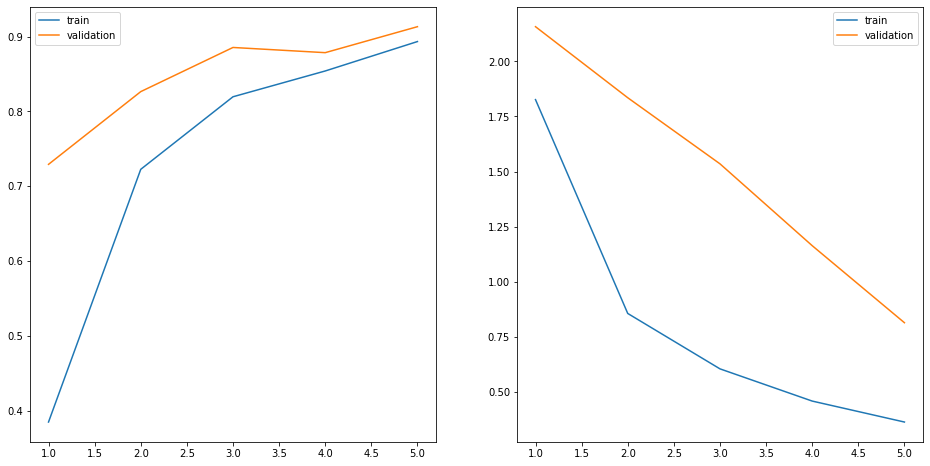

In [200]:
plot_loss_curve(history)